In [1]:
import pandas as pd
import numpy as np
import scipy

#from skbio.diversity import alpha_diversity
#from skbio.diversity import beta_diversity
#from skbio.stats.ordination import pcoa

from statannot import add_stat_annotation
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
import seaborn as sns

from scipy import stats 
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
OTU_df = pd.read_csv('../data/T2D_KBSMC_preproc_otu_table.csv',index_col=0)
OTU_df = OTU_df.set_index('ID')
OTU_df.head()

,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Selenomonadaceae;Megamonas;Megamonas_rupellensis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001032_g;PAC001032_s,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_thetaiotaomicron,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;Agathobacter_rectalis,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_plebeius,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001043_g;PAC001043_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Faecalibacterium;Faecalibacterium_prausnitzii_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eubacterium_g5;Eubacterium_hallii,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001137_g;PAC001137_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;PAC000191_s,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Citrobacter;Citrobacter_gillenii,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Eubacterium_g8;Eubacterium_g8_uc,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC000672_g;PAC000672_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Ruminococcus_g4;DQ071451_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC000748_g;PAC002184_s,Bacteria;Proteobacteria;Deltaproteobacteria;Desulfovibrionales;Desulfovibrionaceae;LT706945_g;PAC001648_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001166_g;PAC001166_g_uc,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Sutterellaceae;Sutterella;Sutterella_uc,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;DQ673521_g;EU774122_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;FJ881160_g;FJ881160_s
ID,,,,,,,,,,,,,,,,,,,,,
R01,7224.0,420.0,158.0,409.0,2107.0,255.0,980.0,231.0,47.0,909.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R02,0.0,34.0,0.0,1591.0,13.0,46.0,852.0,248.0,1.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R03,0.0,188.0,1.0,450.0,181.0,78.0,947.0,94.0,10.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04,4.0,0.0,68.0,1.0,313.0,0.0,5.0,131.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R05,62.0,1.0,4.0,14.0,31.0,2.0,255.0,178.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
evaluation_data = pd.read_csv('../data/validation/PPGR_meal_merged_validation.csv',index_col=0)
eval_samples = list(evaluation_data['ID'].unique())

evaluation_OTU_df = pd.read_csv('../data/validation/preproc_otu_table.csv',index_col=0)
evaluation_OTU_df = evaluation_OTU_df[evaluation_OTU_df['ID'].isin(eval_samples)]
evaluation_OTU_df = evaluation_OTU_df.set_index('ID')
evaluation_OTU_df

,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_caccae,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Eubacterium_g23;PAC001035_s,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Escherichia;Escherichia_coli_group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;Alistipes_putredinis,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Faecalibacterium;Faecalibacterium_prausnitzii_group,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_fragilis,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;PAC001115_g;PAC001220_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;PAC001207_g;PAC001207_s,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_ovatus_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC000661_g;FJ681631_s,...,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC001402_g;PAC001748_s,Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;PAC001266_g;PAC002299_s,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Muribaculaceae;PAC001765_g;PAC002452_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Sporobacter;DQ801038_s,Bacteria;Bacteroidetes;Flavobacteria;Flavobacteriales;Flavobacteriaceae;Bergeyella;Bergeyella_porcorum,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Odoribacteraceae;Odoribacter;HQ793544_s,Bacteria;Proteobacteria;Gammaproteobacteria;Pasteurellales;Pasteurellaceae;Haemophilus;Haemophilus_parahaemolyticus_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;AF371547_s,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Yersiniaceae;Yersinia;Yersinia_enterocolitica_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;KE159571_g;DQ815665_s
ID,,,,,,,,,,,,,,,,,,,,,
C0001,365.0,609.0,16435,805.0,6737,934.0,279.0,3835.0,266.0,510.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0002,10.0,1674.0,3412,889.0,11460,200.0,5.0,69.0,171.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0004,0.0,0.0,6709,0.0,4404,231.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0006,2729.0,0.0,714,1801.0,14248,8.0,0.0,2.0,532.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0007,405.0,0.0,4955,300.0,12936,7.0,0.0,0.0,721.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0008,1.0,0.0,64,1.0,9423,5551.0,0.0,0.0,5347.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0009,3.0,0.0,3907,6.0,681,6.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0011,999.0,1.0,972,0.0,339,3.0,0.0,0.0,59.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
C0012,2.0,0.0,19727,0.0,4251,5.0,0.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Alpha diversity

In [4]:
# Case 1: Raw alpha diversity
main_alpha = pd.DataFrame({
    "chao1": alpha_diversity("chao1", OTU_df, OTU_df.index),
    "shannon": alpha_diversity("shannon", OTU_df, OTU_df.index),
    "simpson": alpha_diversity("simpson", OTU_df, OTU_df.index),
    "observed": alpha_diversity("observed_otus", OTU_df, OTU_df.index)
})

main_alpha.to_csv('../data/main_alpha_diversity.csv')
main_alpha.head()

NameError: name 'alpha_diversity' is not defined

In [ ]:
evaluation_alpha = pd.DataFrame({
    "chao1": alpha_diversity("chao1", evaluation_OTU_df, evaluation_OTU_df.index),
    "shannon": alpha_diversity("shannon", evaluation_OTU_df, evaluation_OTU_df.index),
    "simpson": alpha_diversity("simpson", evaluation_OTU_df, evaluation_OTU_df.index),
    "observed": alpha_diversity("observed_otus", evaluation_OTU_df, evaluation_OTU_df.index)
})
evaluation_alpha.to_csv('../data/eval_alpha_diversity.csv')
evaluation_alpha.head()

In [26]:
# Case 2: Nomalize -> alpha diversity
OTU_df_norm = OTU_df.div(OTU_df.sum(axis=1),axis=0)
alpha = pd.DataFrame({
    "chao1": alpha_diversity("chao1", OTU_df_norm, OTU_df_norm.index),
    "shannon": alpha_diversity("shannon", OTU_df_norm, OTU_df_norm.index),
    "simpson": alpha_diversity("simpson", OTU_df_norm, OTU_df_norm.index),
    "observed": alpha_diversity("observed_otus", OTU_df_norm, OTU_df_norm.index)
})
alpha_metrics = alpha.columns
alpha.head()

NameError: name 'alpha_diversity' is not defined

In [10]:
evaluation_OTU_df_norm = evaluation_OTU_df.div(evaluation_OTU_df.sum(axis=1),axis=0)
evaluation_alpha = pd.DataFrame({
    "chao1": alpha_diversity("chao1", evaluation_OTU_df_norm, evaluation_OTU_df_norm.index),
    "shannon": alpha_diversity("shannon", evaluation_OTU_df_norm, evaluation_OTU_df_norm.index),
    "simpson": alpha_diversity("simpson", evaluation_OTU_df_norm, evaluation_OTU_df_norm.index),
    "observed": alpha_diversity("observed_otus", evaluation_OTU_df_norm, evaluation_OTU_df_norm.index)
})
evaluation_alpha.head()

,chao1,shannon,simpson,observed
ID,,,,
C0001,582.0,5.895816,0.944259,582
C0002,490.0,5.960221,0.962811,490
C0003,396.0,5.315635,0.952446,396
C0004,206.0,3.906622,0.895609,206
C0006,371.0,5.398386,0.957183,371


In [39]:
# Case 3: Filtering -> Nomalize -> alpha diversity
OTU_df_filt = OTU_df.loc[:,list(np.sum(OTU_df>2) > len(OTU_df)*0.1)]
print(OTU_df_filt.shape)
OTU_df_filt_norm = OTU_df_filt.div(OTU_df_filt.sum(axis=1),axis=0)
alpha = pd.DataFrame({
    "chao1": alpha_diversity("chao1", OTU_df_filt_norm, OTU_df_filt_norm.index),
    "shannon": alpha_diversity("shannon", OTU_df_filt_norm, OTU_df_filt_norm.index),
    "simpson": alpha_diversity("simpson", OTU_df_filt_norm, OTU_df_filt_norm.index),
    "observed": alpha_diversity("observed_otus", OTU_df_filt_norm, OTU_df_filt_norm.index)
})
alpha_metrics = alpha.columns
alpha.head()

(49, 377)


,chao1,shannon,simpson,observed
ID,,,,
R01,128.0,3.908392,0.849892,128
R02,165.0,5.047315,0.938073,165
R03,124.0,4.581882,0.919548,124
R04,129.0,3.760241,0.848046,129
R05,184.0,4.746538,0.908885,184


## Categorical variable alpha diversity

In [10]:
main_alpha = pd.read_csv('../data/main_alpha_diversity.csv',index_col=0)
evaluation_alpha = pd.read_csv('../data/eval_alpha_diversity.csv',index_col=0)
alpha_metrics = main_alpha.columns

evaluation_alpha['ID']=evaluation_alpha.index
evaluation_alpha = evaluation_alpha.reset_index(drop=True)

# main cohort
clinical_data_main = pd.read_excel('../data/CGM Nutrition_CRF_20230808_추가Lab.xlsx')
alpha_cate_vis_data_main = pd.merge(main_alpha,clinical_data_main,how='left',on='ID')

# evaluation cohort
clinical_data_eval = pd.read_excel('../data/validation/PPGR_CRF_v1.1_AI카메라없는사람삭제.xlsx')
alpha_cate_vis_data_eval = pd.merge(evaluation_alpha,clinical_data_eval,how='left',on='ID')

In [11]:
res = stats.ttest_ind(alpha_cate_vis_data_main['shannon'],alpha_cate_vis_data_eval['shannon'])
print('shannon',res)
res = stats.ttest_ind(alpha_cate_vis_data_main['simpson'],alpha_cate_vis_data_eval['simpson'])
print('simpson',res)

shannon TtestResult(statistic=-0.22525482938356658, pvalue=0.8223154401108621, df=86.0)
simpson TtestResult(statistic=-0.03542789124989786, pvalue=0.9718206474243664, df=86.0)


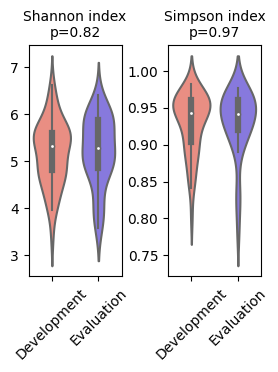

In [68]:
y_shannon = [alpha_cate_vis_data_main['shannon'],alpha_cate_vis_data_eval['shannon']]
y_simpson = [alpha_cate_vis_data_main['simpson'],alpha_cate_vis_data_eval['simpson']]
COLOR_SCALE = ["salmon", "mediumslateblue"]
fig,ax = plt.subplots(1,2,figsize=(3,3))
sns.violinplot(y_shannon, ax=ax[0],palette=COLOR_SCALE,linecolor='black')
sns.violinplot(y_simpson,ax=ax[1],palette=COLOR_SCALE)
ax[0].set_title('Shannon index\np=0.82',size=10)
ax[1].set_title('Simpson index\np=0.97',size=10)

xlabels = [f"{type_}" for i, type_ in enumerate(['Development','Evaluation'])]
ax[0].set_xticks([0,1])
ax[0].set_xticklabels(xlabels, size=10, ha="center", ma="center",rotation=45)
ax[1].set_xticks([0,1])
ax[1].set_xticklabels(xlabels, size=10, ha="center", ma="center",rotation=45)
plt.subplots_adjust(wspace=0.5)
plt.show()

In [25]:
def alph_vis_cate(alpha_df,col,xlabel):
    fig = plt.figure(figsize=(15,4))
    cate = alpha_df[col].unique()
    for i,c in enumerate(alpha_metrics):
        ax = plt.subplot(1,4,i+1)
        ax = sns.boxplot(x=col,y=c,data=alpha_df)
        #add_stat_annotation(ax, data=alpha_df, x=col,y=c,
        #                    box_pairs=[(cate[0],cate[1])],test='t-test_ind', 
        #                    text_format='star', loc='inside', verbose=0, show_test_name=False)
        ax.set_xlabel(None)
    fig.supxlabel(xlabel,y=0)
    plt.subplots_adjust(wspace=0.3)
    plt.show()

C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


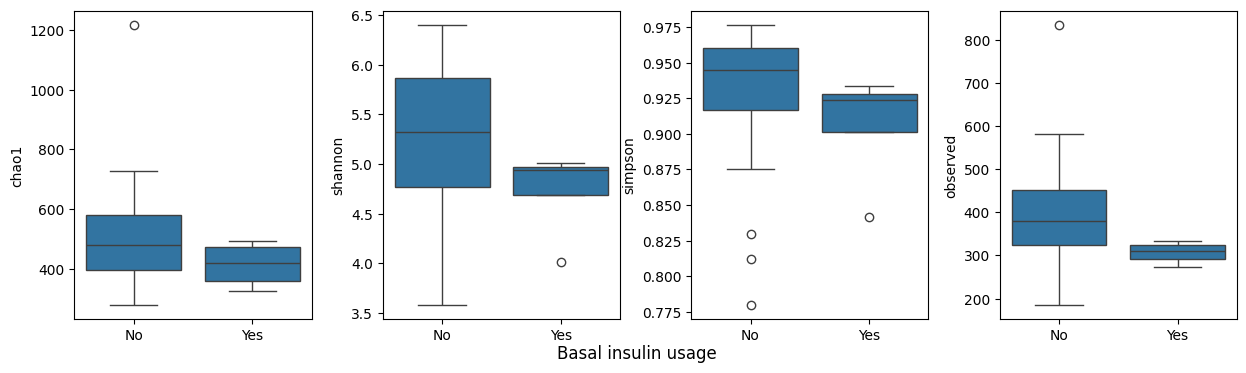

In [26]:
alpha_cate_vis_data_eval['Insulin_use(Basal)'] = np.where(alpha_cate_vis_data_eval['Insulin_use(Basal)']==0,'No','Yes')
alph_vis_cate(alpha_cate_vis_data_eval,'Insulin_use(Basal)','Basal insulin usage')

C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


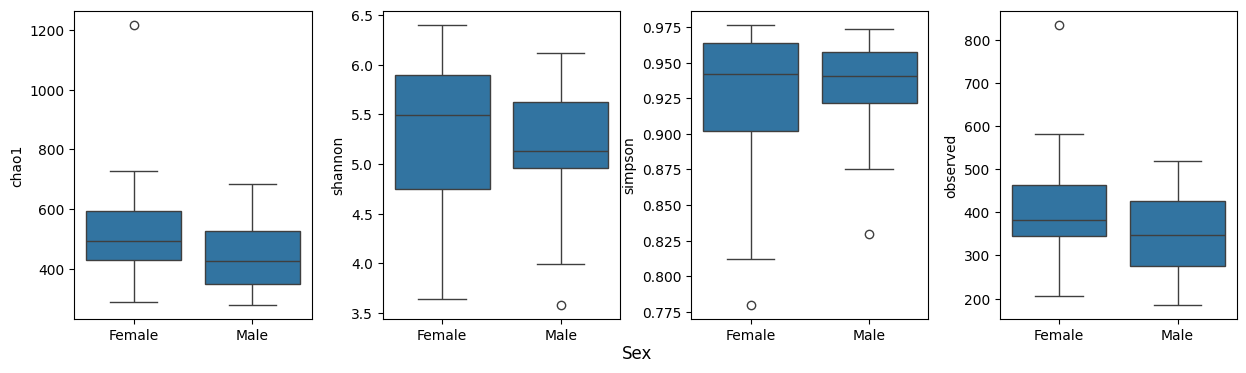

In [27]:
alpha_cate_vis_data['Sex'] = np.where(alpha_cate_vis_data['Sex']==1,'Male','Female')
alph_vis_cate(alpha_cate_vis_data,'Sex','Sex')

C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


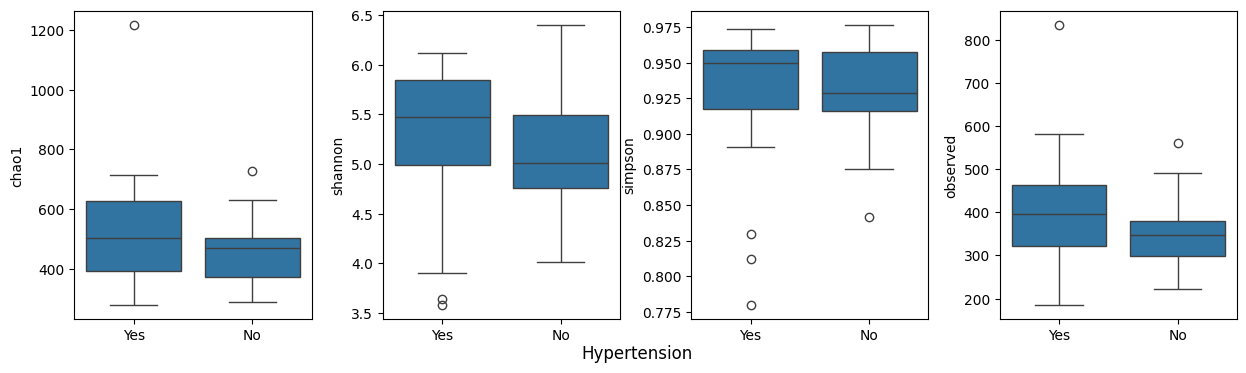

In [28]:
alpha_cate_vis_data['HTN'] = np.where(alpha_cate_vis_data['HTN']==0,'Yes','No')
alph_vis_cate(alpha_cate_vis_data,'HTN','Hypertension')

C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


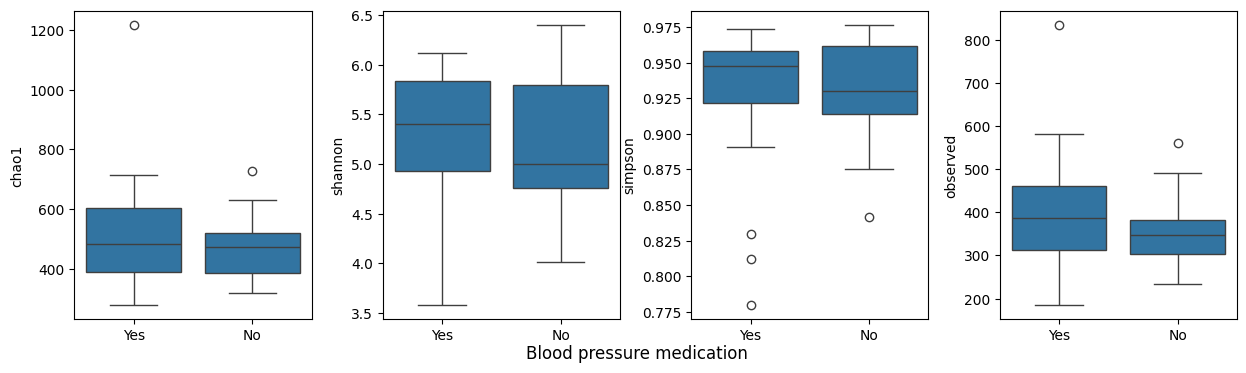

In [29]:
alpha_cate_vis_data['BP_med'] = np.where(alpha_cate_vis_data['BP_med']==0,'Yes','No')
alph_vis_cate(alpha_cate_vis_data,'BP_med','Blood pressure medication')

C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


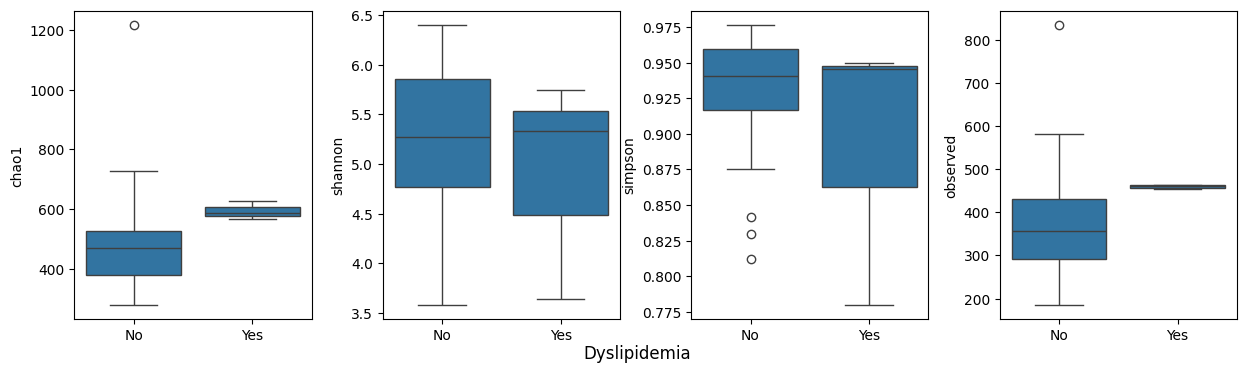

In [30]:
alpha_cate_vis_data['Dyslipidemia'] = np.where(alpha_cate_vis_data['Dyslipidemia']==0,'Yes','No')
alph_vis_cate(alpha_cate_vis_data,'Dyslipidemia','Dyslipidemia')

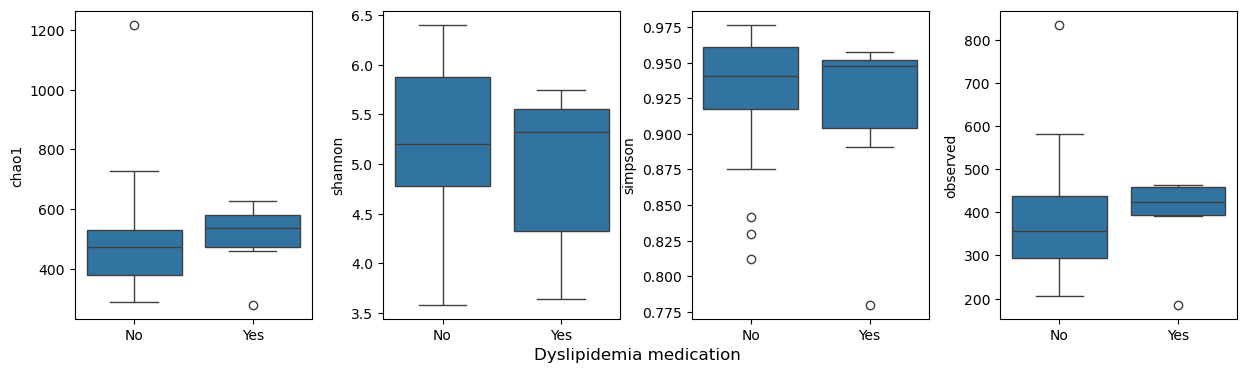

In [47]:
alpha_cate_vis_data['Dyslipidemia_med'] = np.where(alpha_cate_vis_data['Dyslipidemia_med']==0,'Yes','No')
alph_vis_cate(alpha_cate_vis_data,'Dyslipidemia_med','Dyslipidemia medication')

## Continuous variable alpha diversity

In [48]:
def alph_vis_cont(alpha_df,col,xlabel):
    fig = plt.figure(figsize=(15,3))
    cate = alpha_df[col].unique()
    for i,c in enumerate(alpha_metrics):
        ax = plt.subplot(1,4,i+1)
        ax = sns.regplot(x=col,y=c,data=alpha_df,scatter_kws={"fc":"gray", "ec":"gray", "s":10, "alpha":0.5})
        ax.set_xlabel(None)
    fig.supxlabel(xlabel,y=-0.1)
    plt.subplots_adjust(wspace=0.4)
    plt.show()

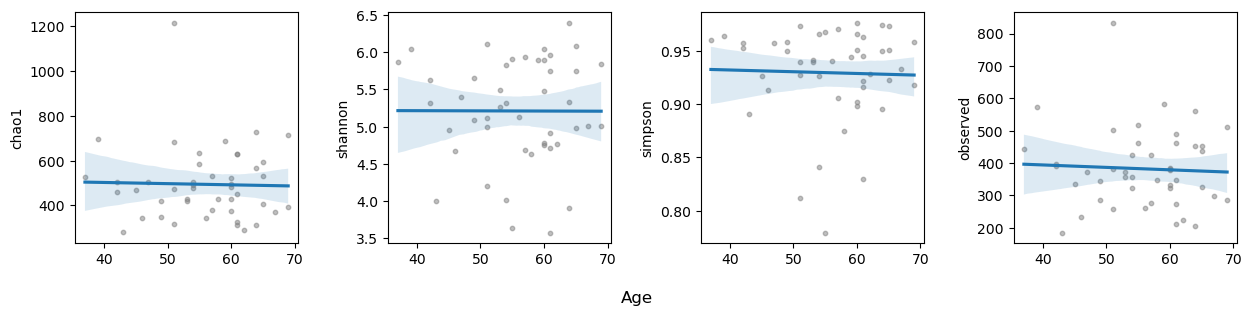

In [49]:
alph_vis_cont(alpha_cate_vis_data,'Age','Age')

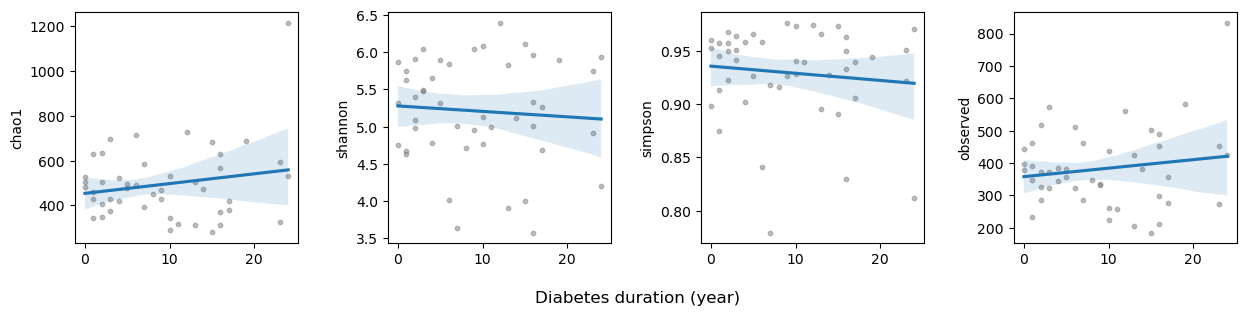

In [50]:
alph_vis_cont(alpha_cate_vis_data,'DM_Duration','Diabetes duration (year)')

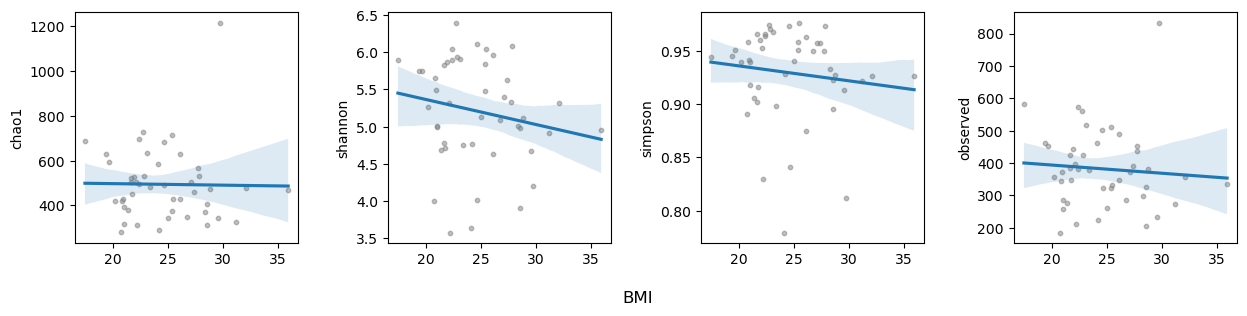

In [51]:
alph_vis_cont(alpha_cate_vis_data,'BMI','BMI')

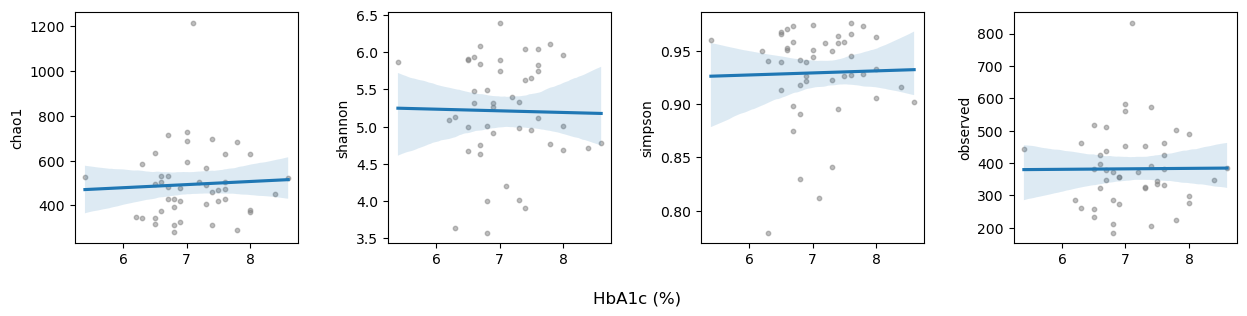

In [52]:
alph_vis_cont(alpha_cate_vis_data,'HbA1c','HbA1c (%)')

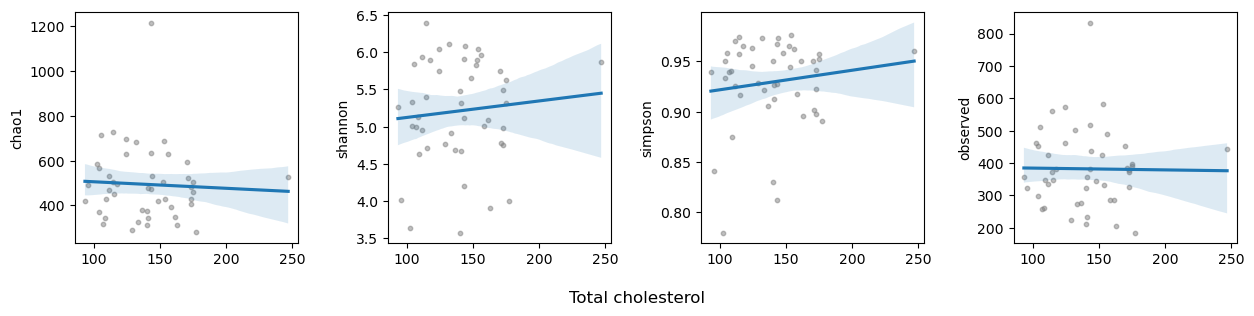

In [53]:
alph_vis_cont(alpha_cate_vis_data,'Total_chol','Total cholesterol')

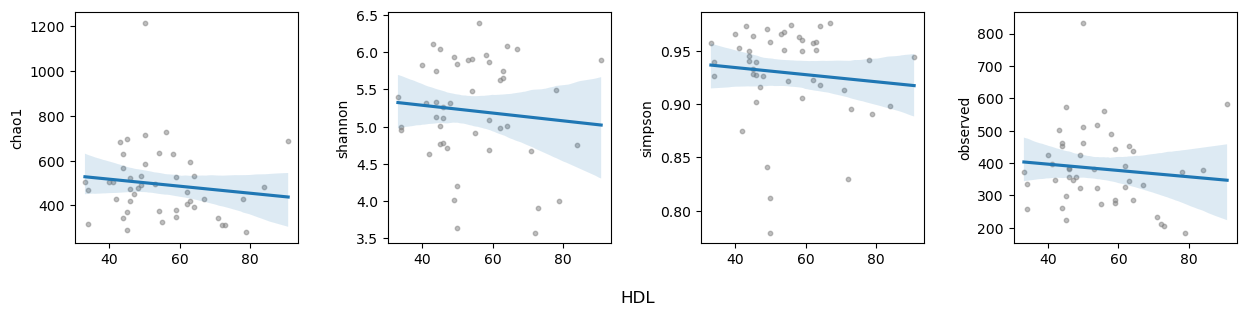

In [54]:
alph_vis_cont(alpha_cate_vis_data,'HDL','HDL')

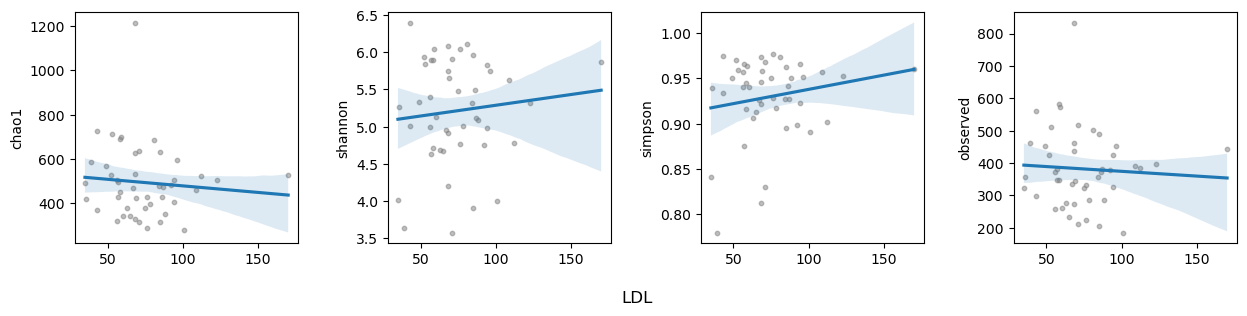

In [55]:
alph_vis_cont(alpha_cate_vis_data,'LDL','LDL')

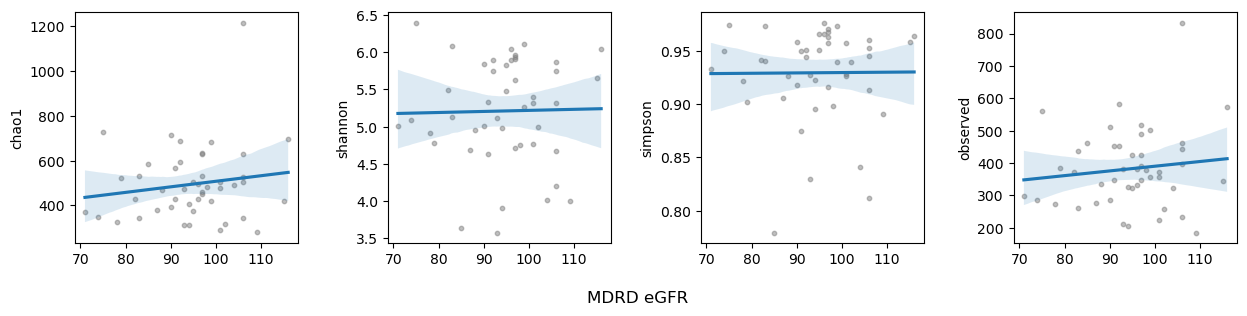

In [56]:
alph_vis_cont(alpha_cate_vis_data,'MDRD_eGFR','MDRD eGFR')

## Cohort comparision

# Beta diversity

In [8]:
def confidence_ellipse(x, y, ax, n_std=5.0, facecolor='none', **kwargs):

    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [21]:
main_beta = beta_diversity("braycurtis", OTU_df, OTU_df.index)
evaluation_beta = beta_diversity("braycurtis", evaluation_OTU_df, evaluation_OTU_df.index)

main_pcoa_res = pcoa(main_beta)
evaluation_pcoa_res = pcoa(evaluation_beta)

embedded_main = main_pcoa_res.samples[['PC1', 'PC2','PC3']]
embedded_main['cohort'] = 'Main'

embedded_evaluation = evaluation_pcoa_res.samples[['PC1', 'PC2','PC3']]
embedded_evaluation['cohort'] = 'Evaluation'

beta_cohort_merged = pd.concat([embedded_main,embedded_evaluation],axis=0)
beta_cohort_merged.to_csv('../data/beta_diversity.csv')

/home/lsh/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.025107810343192878 and the largest is 2.406845919261835.
  warn(
/home/lsh/anaconda3/lib/python3.10/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0

In [6]:
beta_cohort_merged = pd.read_csv('../data/beta_diversity.csv',index_col=0)

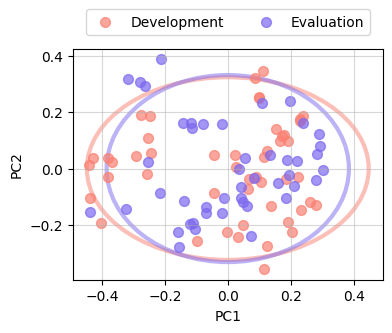

In [69]:
xs = beta_cohort_merged['PC1']
ys = beta_cohort_merged['PC2']
zs = beta_cohort_merged['PC3']

fig, ax = plt.subplots(figsize=(4,3))
color_map = ['salmon','mediumslateblue']
for state, color in zip(['Development','Evaluation'], color_map):
    idxs = np.where(beta_cohort_merged['cohort'] == state)
    # No legend will be generated if we don't pass label=species
    confidence_ellipse(xs.values[idxs], ys.values[idxs], ax,  n_std=2, alpha=0.5, facecolor='None', edgecolor=color,linewidth=3, zorder=0)
    ax.scatter(
        xs.values[idxs], ys.values[idxs], label=state,
        s=50, color=color, alpha=0.7
    )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='upper center',ncol=3,bbox_to_anchor=(0.5, 1.2))
plt.grid(True,alpha=0.5)
plt.savefig('../figure/beta_diversity.jpeg',dpi=300,bbox_inches='tight')
plt.show()

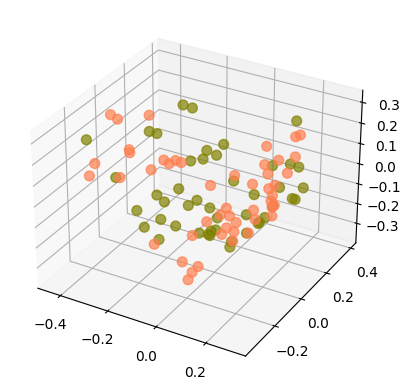

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for state, color in zip(['Main','Evaluation'], color_map):
    idxs = np.where(beta_cohort_merged['cohort'] == state)
    # No legend will be generated if we don't pass label=species
    ax.scatter(
        xs.values[idxs], ys.values[idxs],zs.values[idxs], label=state,
        s=50, color=color, alpha=0.7
    )

# Filtering

In [42]:
# count가 2보다 작은 경우 노이즈 (시퀀싱 에러) 라고 판단 
OTU_df_filt = OTU_df.loc[:,list(np.sum(OTU_df>2) > len(OTU_df)*0.1)]
print(OTU_df_filt.shape)
OTU_list = list(OTU_df_filt.columns)
#OTU_df_filt.to_csv('../data/T2D_KBSMC_otu_filt.csv')
OTU_df_filt.head()

(49, 457)


C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Selenomonadaceae;Megamonas;Megamonas_rupellensis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001032_g;PAC001032_s,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_thetaiotaomicron,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;Agathobacter_rectalis,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_plebeius,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001043_g;PAC001043_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Faecalibacterium;Faecalibacterium_prausnitzii_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eubacterium_g5;Eubacterium_hallii,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001137_g;PAC001137_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;PAC000191_s,...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;PAC001397_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;Anaerotignum_lactatifermentans,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Kluyvera;Kluyvera_ascorbata,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiaceae;Clostridium;DQ796080_s,Bacteria;Firmicutes;Bacilli;Bacillales;Bacillaceae;Bacillus;Bacillus_subtilis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;PAC001224_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Mogibacterium_f;PAC001168_g;PAC001917_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Massilioclostridium;Massilioclostridium_coli,Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Clostridium_g6;Clostridium_spiroforme,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Enterobacter;Enterobacter_cloacae_group
ID,,,,,,,,,,,,,,,,,,,,,
R01,7224.0,420.0,158.0,409.0,2107.0,255.0,980.0,231.0,47.0,909.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R02,0.0,34.0,0.0,1591.0,13.0,46.0,852.0,248.0,1.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R03,0.0,188.0,1.0,450.0,181.0,78.0,947.0,94.0,10.0,87.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04,4.0,0.0,68.0,1.0,313.0,0.0,5.0,131.0,0.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R05,62.0,1.0,4.0,14.0,31.0,2.0,255.0,178.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Normalization

In [34]:
OTU_df_norm = OTU_df_filt.div(OTU_df_filt.sum(axis=1),axis=0)
OTU_df_norm.to_csv('../data/T2D_KBSMC_otu_norm.csv')
OTU_df_norm.head()

,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Selenomonadaceae;Megamonas;Megamonas_rupellensis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001032_g;PAC001032_s,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_thetaiotaomicron,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;Agathobacter_rectalis,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_plebeius,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001043_g;PAC001043_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Faecalibacterium;Faecalibacterium_prausnitzii_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eubacterium_g5;Eubacterium_hallii,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001137_g;PAC001137_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;PAC000191_s,...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;PAC001397_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;Anaerotignum_lactatifermentans,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Kluyvera;Kluyvera_ascorbata,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiaceae;Clostridium;DQ796080_s,Bacteria;Firmicutes;Bacilli;Bacillales;Bacillaceae;Bacillus;Bacillus_subtilis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;PAC001224_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Mogibacterium_f;PAC001168_g;PAC001917_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Massilioclostridium;Massilioclostridium_coli,Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Clostridium_g6;Clostridium_spiroforme,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Enterobacter;Enterobacter_cloacae_group
ID,,,,,,,,,,,,,,,,,,,,,
R01,0.292044,0.016979,0.006387,0.016535,0.085179,0.010309,0.039618,0.009339,0.001900,0.036748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R02,0.000000,0.002632,0.000000,0.123181,0.001007,0.003561,0.065965,0.019201,0.000077,0.001936,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R03,0.000000,0.008331,0.000044,0.019942,0.008021,0.003457,0.041968,0.004166,0.000443,0.003856,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R04,0.000128,0.000000,0.002179,0.000032,0.010029,0.000000,0.000160,0.004198,0.000000,0.000993,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
R05,0.005362,0.000086,0.000346,0.001211,0.002681,0.000173,0.022053,0.015394,0.000000,0.000346,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Taxonomic analysis

In [8]:
def collapse_otu(df, level):
    OTU_ = pd.DataFrame()
    level_list = list(set([';'.join(OTU.split(';')[0:level]) for OTU in OTU_list]))
    for i in range(len(level_list)):
        the_otu = [OTU for OTU in df.columns if level_list[i] in OTU]
        OTU_[level_list[i]] = df[the_otu].sum(axis=1)
        
    return OTU_

def collapse_otu_v2(df, level):
    OTU_ = pd.DataFrame()
    
    for j in range(level,7):
        level_list = list(set([';'.join(OTU.split(';')[0:j]) for OTU in OTU_list]))
        print(f'level {j}:',len(level_list))
        for i in range(len(level_list)):
            the_otu = [OTU for OTU in df.columns if level_list[i] in OTU]
            OTU_[level_list[i]] = df[the_otu].sum(axis=1)
    #print(f'level {7}:',len(OTU_list))    
    return OTU_

In [9]:
import warnings
warnings.filterwarnings("ignore")

full_OTU = collapse_otu_v2(OTU_df_norm,2)
#full_OTU.to_csv('../data/T2D_KBSMC_full_otu.csv')
#full_OTU.to_csv('T2D_KBSMC_phylum_to_genus.csv')
full_OTU.head()

level 2: 8
level 3: 15
level 4: 22
level 5: 42
level 6: 179


,Bacteria;Firmicutes,Bacteria;Synergistetes,Bacteria;Fusobacteria,Bacteria;Tenericutes,Bacteria;Bacteroidetes,Bacteria;Verrucomicrobia,Bacteria;Proteobacteria,Bacteria;Actinobacteria,Bacteria;Proteobacteria;Gammaproteobacteria,Bacteria;Actinobacteria;Actinobacteria_c,...,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC000672_g,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Enterobacter,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Klebsiella,Bacteria;Actinobacteria;Actinobacteria_c;Corynebacteriales;Corynebacteriaceae;Corynebacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001269_g,Bacteria;Actinobacteria;Actinobacteria_c;Bifidobacteriales;Bifidobacteriaceae;Bifidobacterium,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Subdoligranulum,Bacteria;Verrucomicrobia;Verrucomicrobiae;Verrucomicrobiales;Akkermansiaceae;Akkermansia
ID,,,,,,,,,,,,,,,,,,,,,
R01,0.636015,0.000000,0.000000,0.000000,0.266696,0.000040,0.058341,0.038908,0.058341,0.034100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.034059,0.016525,0.003879,0.000768,0.000040
R02,0.943875,0.000000,0.000000,0.000000,0.027677,0.000000,0.001542,0.026906,0.001465,0.013877,...,0.000077,0.000308,0.000000,0.000000,0.000154,0.012335,0.122658,0.011873,0.020276,0.000000
R03,0.491450,0.000000,0.000000,0.000000,0.453309,0.000000,0.027377,0.027864,0.018251,0.015327,...,0.000089,0.000000,0.000000,0.000000,0.000000,0.015062,0.020023,0.005050,0.003987,0.000000
R04,0.417435,0.000000,0.000256,0.000000,0.550730,0.000096,0.010152,0.021330,0.001954,0.019472,...,0.000000,0.000384,0.000224,0.000000,0.000000,0.019440,0.000032,0.000352,0.016782,0.000096
R05,0.838153,0.000518,0.000000,0.000345,0.040138,0.101079,0.000432,0.019335,0.000345,0.003625,...,0.000000,0.000086,0.000173,0.000259,0.000000,0.001726,0.001208,0.000086,0.007078,0.101079


In [41]:
duplicated_otu = []
for i in range(len(full_OTU.columns)-1,1,-1):
    for j in range(i-1,0,-1):
        if (full_OTU.iloc[:,i] == full_OTU.iloc[:,j]).all():
            if full_OTU.columns[j] in full_OTU.columns[i]:
                duplicated_otu.append(full_OTU.columns[j])
                
OTU_data_dropped = full_OTU.loc[:,~full_OTU.columns.isin(duplicated_otu)]
OTU_data_dropped.to_csv('../data/T2D_KBSMC_phylum_to_genus_dropped.csv')
OTU_data_dropped.head()

,Bacteria;Verrucomicrobia,Bacteria;Actinobacteria,Bacteria;Firmicutes,Bacteria;Proteobacteria,Bacteria;Proteobacteria;Gammaproteobacteria,Bacteria;Actinobacteria;Actinobacteria_c,Bacteria;Firmicutes;Negativicutes,Bacteria;Firmicutes;Bacilli,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales,...,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Barnesiellaceae;Barnesiella,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001137_g,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Howardella,Bacteria;Proteobacteria;Betaproteobacteria;Burkholderiales;Sutterellaceae;Sutterella,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Kluyvera,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Lachnospiraceae_uc,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC001200_g,Bacteria;Firmicutes;Negativicutes;Selenomonadales;Selenomonadaceae;Megamonas,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Caproiciproducens
ID,,,,,,,,,,,,,,,,,,,,,
R01,0.000040,0.038908,0.636015,0.058341,0.058341,0.034100,0.300675,0.006141,0.266696,0.058260,...,0.000000,0.001212,0.001899,0.000000,0.000000,0.0,0.000242,0.000808,0.292190,0.000485
R02,0.000000,0.026906,0.943875,0.001542,0.001465,0.013877,0.030453,0.165292,0.027677,0.001156,...,0.000540,0.004163,0.000077,0.001156,0.000000,0.0,0.002082,0.000771,0.000000,0.000000
R03,0.000000,0.027864,0.491450,0.027377,0.018251,0.015327,0.021396,0.009436,0.453309,0.008461,...,0.000000,0.001152,0.000443,0.000000,0.000044,0.0,0.002481,0.000221,0.000000,0.000089
R04,0.000096,0.021330,0.417435,0.010152,0.001954,0.019472,0.068697,0.002434,0.550730,0.001313,...,0.000000,0.000032,0.000000,0.000416,0.007366,0.0,0.000512,0.000000,0.000128,0.000128
R05,0.101079,0.019335,0.838153,0.000432,0.000345,0.003625,0.009668,0.246439,0.040138,0.000345,...,0.005179,0.001640,0.000000,0.000000,0.000000,0.0,0.000432,0.000777,0.005352,0.005006


## Phylum level composition bar plot

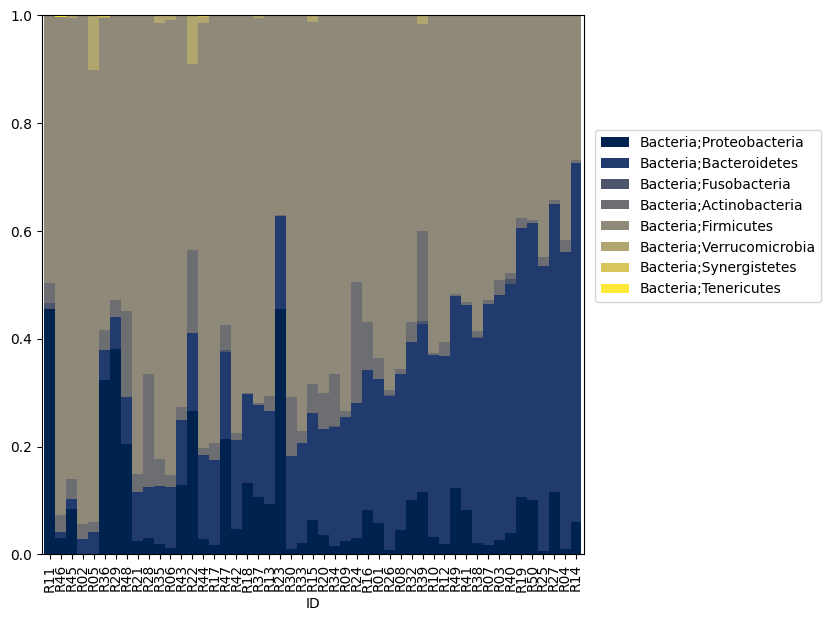

In [31]:
OTU_l2 = collapse_otu(OTU_df_norm,2)

sorted_OTU_l2 = OTU_l2.sort_values('Bacteria;Bacteroidetes')
sorted_OTU_l2.plot(kind='bar',stacked=True,figsize=(7,7),width=1,ylim=(0,1),colormap='cividis')
plt.legend(loc='upper right',bbox_to_anchor=(1.45, 0.8))
plt.show()

## Class level composition bar plot

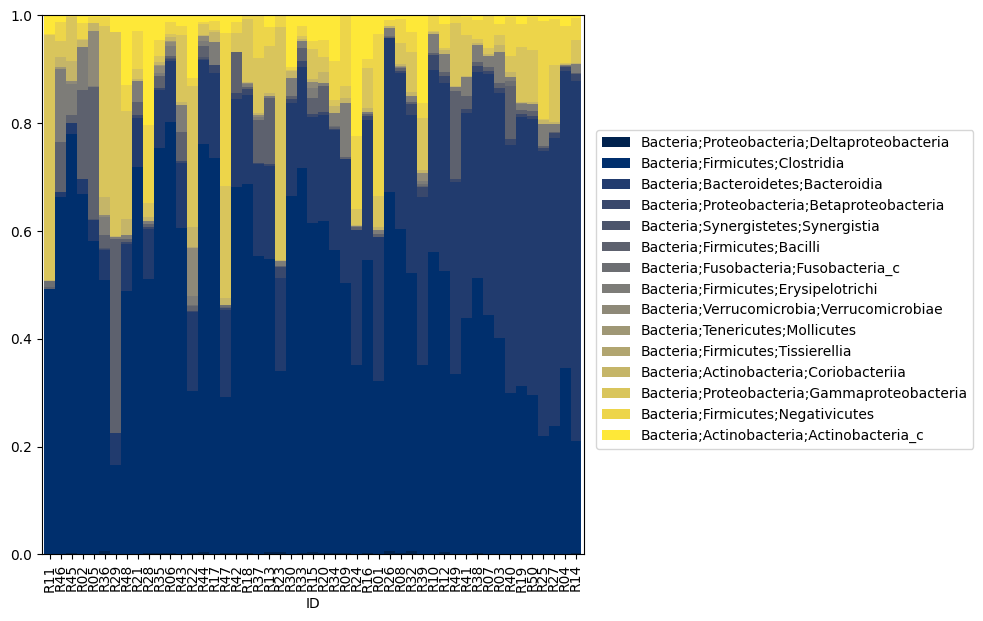

In [32]:
OTU_l3 = collapse_otu(OTU_df_norm,3)

sorted_OTU_l3 = OTU_l3.sort_values('Bacteria;Bacteroidetes;Bacteroidia')
sorted_OTU_l3.plot(kind='bar',stacked=True,figsize=(7,7),width=1,ylim=(0,1),colormap='cividis')
plt.legend(loc='upper right',bbox_to_anchor=(1.73, 0.8))
plt.show()

## Orderlevel composition bar plot

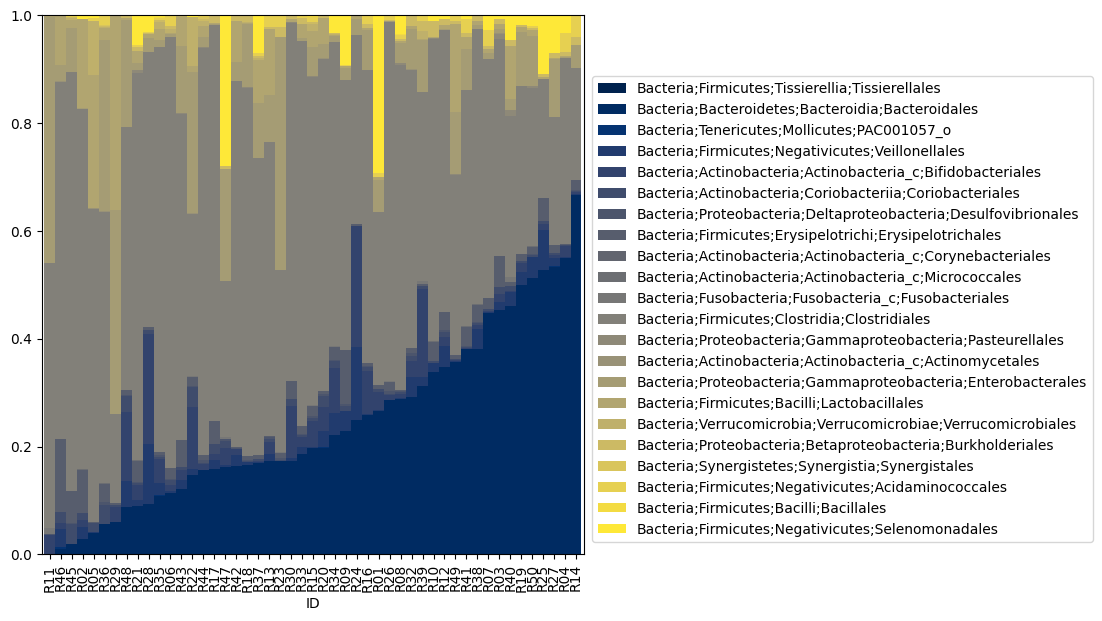

In [33]:
OTU_l4 = collapse_otu(OTU_df_norm,4)

sorted_OTU_l4 = OTU_l4.sort_values('Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales')
sorted_OTU_l4.plot(kind='bar',stacked=True,figsize=(7,7),width=1,ylim=(0,1),colormap='cividis')
plt.legend(loc='upper right',bbox_to_anchor=(1.95, 0.9))
plt.show()

# Microbiome feature selection
## 1. Pearson's correlation
* No scailing
* min-max scaling
* standard scaling

In [47]:
OTU_data = pd.read_csv('../data/T2D_KBSMC_otu_norm.csv',index_col=0)
print(OTU_data.shape)
OTU_data.loc[:,list(np.sum(OTU_data>0) < len(OTU_data)*0.2)]

(49, 457)


C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;Alistipes_ihumii,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eubacterium_g4;PAC001174_s,Bacteria;Firmicutes;Bacilli;Lactobacillales;Streptococcaceae;Lactococcus;Lactococcus_garvieae_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;FTRU_g;FTRU_g_uc,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas_faecis,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum;FJ365168_s,Bacteria;Firmicutes;Negativicutes;Veillonellales;Veillonellaceae;Veillonella;Veillonella_rogosae,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eisenbergiella;Eisenbergiella_tayi,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Ruminococcus_g2;EU728793_s,Bacteria;Firmicutes;Negativicutes;Veillonellales;Veillonellaceae;Megasphaera;Megasphaera_indica,...,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Erwiniaceae;Pantoea;Pantoea_coffeiphila,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Porphyromonadaceae;Parabacteroides;HQ761618_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum;AY858529_s,Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Coprobacillus;NFLD_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;Anaerotignum_lactatifermentans,Bacteria;Firmicutes;Bacilli;Bacillales;Bacillaceae;Bacillus;Bacillus_subtilis_group,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;PAC001224_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Mogibacterium_f;PAC001168_g;PAC001917_s,Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Clostridium_g6;Clostridium_spiroforme,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Enterobacter;Enterobacter_cloacae_group
ID,,,,,,,,,,,,,,,,,,,,,
R01,0.000364,0.001698,0.000040,0.000081,0.000040,0.000040,0.000040,0.000040,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R02,0.000000,0.001239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012852,0.003484,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000222,0.000089,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000320,0.000000,0.000032,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R05,0.000000,0.004151,0.000000,0.000259,0.000519,0.000000,0.000000,0.000000,0.000086,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000042,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000182,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R08,0.000000,0.000000,0.000257,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
R09,0.000000,0.000000,0.000000,0.000639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Remained OTU number : 367


C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jkw20\anaconda3\envs\AI\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

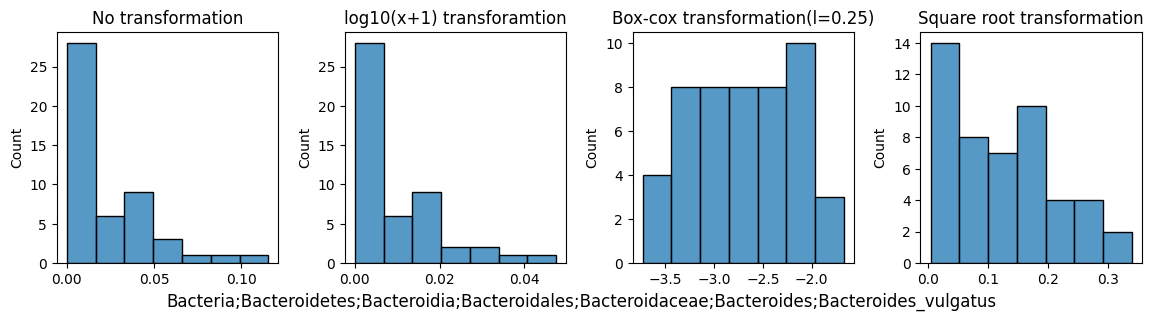

In [35]:
# 303 Relative abundance transforamtion
#  1) No transformation
#  2) log10(x+1) transformation
#  3) Box-cox transformation (l=0.25)
#  4) Sqaured root transformation

OTU_data = pd.read_csv('../data/T2D_KBSMC_otu_norm.csv',index_col=0)
#OTU_data=OTU_df_norm
## 전체 데이터의 20% 초과에서 0일 경우 제외
OTU_data = OTU_data.loc[:,list(np.sum(OTU_data>0) > len(OTU_data)*0.2)]
#OTU_data = OTU_data.iloc[:,np.where(np.std(OTU_data) < np.mean(OTU_data,axis=0)*2)[0]]
print('Remained OTU number :',len(OTU_data.columns))
OTU_col = list(OTU_data.columns)
OTU_data_log = np.log10(OTU_data+1)
OTU_data_bc = pd.DataFrame(stats.boxcox(OTU_data,lmbda=0.25),columns=OTU_col,index=OTU_data.index)
OTU_data_root = np.sqrt(OTU_data)

n = 11 # example OTU

fig, axs = plt.subplots(1, 4, figsize=(14, 3))

sns.histplot(OTU_data[OTU_col[n]],ax=axs[0])
sns.histplot(OTU_data_log[OTU_col[n]],ax=axs[1])
sns.histplot(OTU_data_bc[OTU_col[n]],ax=axs[2])
sns.histplot(OTU_data_root[OTU_col[n]],ax=axs[3])
axs[0].set_xlabel(None)
axs[1].set_xlabel(None)
axs[2].set_xlabel(None)
axs[3].set_xlabel(None)
axs[0].set_title('No transformation')
axs[1].set_title('log10(x+1) transforamtion')
axs[2].set_title('Box-cox transformation(l=0.25)')
axs[3].set_title('Square root transformation')


fig.supxlabel(OTU_col[n],y=-0.05)
plt.subplots_adjust(wspace=0.3)
plt.show()

In [36]:
PPGR_meal_merged = pd.read_csv('../data/PPGR_meal_merged_cont2.csv',index_col=0)
CGM_post120_col = list(PPGR_meal_merged.columns[71:96])
CGM_post240_col = list(PPGR_meal_merged.columns[71:120])

PPGR_meal_merged[CGM_post240_col] = PPGR_meal_merged.loc[:,CGM_post240_col].interpolate(axis=1)
G0 = PPGR_meal_merged['p_000']

cgm_cols = list(PPGR_meal_merged.columns[71:120])

iAUC_2h = [0]*len(PPGR_meal_merged)
for i in range(1,25):
    Gi = PPGR_meal_merged[CGM_post120_col[i]]
    Gi_1 = PPGR_meal_merged[CGM_post120_col[i-1]]
    Si = ((Gi-G0)+(Gi_1-G0))/2
    iAUC_2h+=Si*5
    
iAUC_4h = [0]*len(PPGR_meal_merged)
for i in range(1,49):
    Gi = PPGR_meal_merged[CGM_post240_col[i]]
    Gi_1 = PPGR_meal_merged[CGM_post240_col[i-1]]
    Si = ((Gi-G0)+(Gi_1-G0))/2
    iAUC_4h+=Si*5
    
PPGR_meal_merged['PPGR_u2'] = iAUC_2h/60
PPGR_meal_merged['PPGR_u4'] = iAUC_4h/60

#PPGR_meal_merged_filt = PPGR_meal_merged[(PPGR_meal_merged['meal_m1']>=-1440)]
PPGR_meal_merged_filt = PPGR_meal_merged[(PPGR_meal_merged['Energy(kcal)']<2000) & (PPGR_meal_merged['Carb(g)']<250)]

med_data = pd.read_excel('../data/CGM Nutrition_CRF_Medication.xlsx')
clinical_data = pd.read_excel('../data/CGM Nutrition_CRF_20230808_추가Lab.xlsx')

CGM_pre30_col = list(PPGR_meal_merged_filt.columns[65:72]) #7
PPGR_data =  PPGR_meal_merged_filt.dropna(subset=['PPGR_u2','meal_m1']+CGM_pre30_col,axis=0)

PPGR = 'PPGR_u2'
CHO = 'Carb(g)'
nutrition_col = ['Carb(g)','Protein(g)','Fat(g)','Energy(kcal)','Fiber(g)']

PPGR_data[PPGR] = PPGR_data[PPGR].astype(float)
full_data = pd.merge(PPGR_data[['ID',PPGR]+CGM_pre30_col+nutrition_col],OTU_data_bc,left_on='ID',right_index=True)
full_data['Carb_root'] = full_data['Carb(g)']**(1/2)
samples = list(full_data['ID'].unique())

full_data

C:\Users\jkw20\AppData\Local\Temp\ipykernel_18168\2895997779.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PPGR_data[PPGR] = PPGR_data[PPGR].astype(float)


,ID,PPGR_u2,m_030,m_025,m_020,m_015,m_010,m_005,p_000,Carb(g),...,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Pseudoflavonifractor;PAC001189_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eisenbergiella;KE992700_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Dorea;Dorea_massiliensis,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Pseudoflavonifractor;Intestinimonas_butyriciproducens,Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;PAC001397_s,Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Kluyvera;Kluyvera_ascorbata,Bacteria;Firmicutes;Clostridia;Clostridiales;Clostridiaceae;Clostridium;DQ796080_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Massilioclostridium;Massilioclostridium_coli,Carb_root
1,R01,114.625000,131.0,135.0,135.0,131.0,125.0,120.0,116.0,5.75000,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,2.397916
2,R01,26.666667,130.0,136.0,141.0,144.0,147.0,149.0,151.0,60.29500,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,7.764986
3,R01,141.750000,119.0,118.0,117.0,116.0,116.0,115.0,116.0,136.54330,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,11.685174
4,R01,208.458333,85.0,85.0,87.0,90.0,97.0,108.0,122.0,175.81600,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,13.259563
5,R01,168.083333,104.0,101.0,99.0,98.0,97.0,98.0,100.0,84.41000,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,9.187491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,R50,60.583333,190.0,186.0,181.0,175.0,169.0,165.0,162.0,78.79700,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,8.876767
992,R50,24.458333,188.0,187.0,186.0,185.0,184.0,183.0,183.0,54.26000,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,7.366139
993,R50,-4.875000,162.0,162.0,163.0,164.0,165.0,166.0,166.0,73.63320,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,8.580979
994,R50,-40.250000,226.0,224.0,222.0,222.0,221.0,221.0,220.0,38.04943,...,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,-4.0,6.168422


In [37]:
# featurtes are ranked accordign to Pearson correlation coefficient
R = []
P = []

X = full_data[PPGR]/full_data['Carb(g)'].astype(float)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
IQR = q3-q1
dff = X[(X<=q3 + (3*IQR)) & (X>=q1-(3*IQR))]
X = dff

for otu in OTU_col:
    r,p = stats.pearsonr(full_data[otu][dff.index],X)
    R.append(r)
    P.append(p)
pearson_sorted_features = pd.DataFrame({'feature':OTU_col,'score':R,'abs_score':np.abs(R),'p-value':P}).sort_values('abs_score',ascending=False)

In [40]:
len(pearson_sorted_features[pearson_sorted_features['p-value']<0.05])

39

# Optimal microbiome feature number

In [114]:
import tensorflow as tf
from tensorflow.keras import Model, models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D,Dense,MaxPooling1D,Flatten,Dropout,concatenate, Concatenate,GRU, concatenate, Input, LSTM, Bidirectional, BatchNormalization, ReLU
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.regularizers import l2, l1_l2
from tensorflow.keras.optimizers.legacy import Adam
import random
import warnings
 
def microbiome_representation(microbiome_input, microbiome_units=20):
   drop1 = Dropout(0.3)(microbiome_input)                         # best dropout 0.5
   dense_layer = Dense(microbiome_units,name='microbiome_FC')(microbiome_input) # best node 20
   batchnorm = BatchNormalization()(dense_layer) 
   relu = ReLU()(batchnorm)
   drop2 = Dropout(0.5)(relu)                                   # best dropout 0.5
   return relu

def fusion_regressor(concatenated_features, regression_units=50, dropout_rate=0.5):
   dense_layer = Dense(regression_units, kernel_regularizer=l1_l2(l1=1e-6, l2=0.001), bias_regularizer=l1_l2(l1=1e-6, l2=0.001))(concatenated_features)                     # best node 40
   batchnorm = BatchNormalization()(dense_layer)
   relu = ReLU()(batchnorm)
   drop = Dropout(dropout_rate)(relu)
    
   output_layer = Dense(1)(drop)
   return output_layer

def wrapper_MLP(microbiome_col):
   random.seed(2)
   np.random.seed(2)
   tf.random.set_seed(2)

   input_layer_carbohydrate = Input(shape=(1,), name='Carbohydrate')
   input_layer_microbiome = Input(shape=(len(microbiome_col),), name='Microbiome')
    
   if len(microbiome_col)<=10:
       n_units=10
   elif len(microbiome_col)<=50:
       n_units=20
   else: n_units=30
        
   microbiome_features = microbiome_representation(input_layer_microbiome,n_units)
   
   concat = concatenate([input_layer_carbohydrate,microbiome_features])
   output = fusion_regressor(concat,n_units,0.5) 

   model = Model(inputs=[input_layer_carbohydrate,input_layer_microbiome], outputs=output)

   learning_rate = 0.005
   model.compile(optimizer = Adam(learning_rate=learning_rate),loss='mse')

   return model

## IWSS

In [111]:
selected_features = []
best_performance = 0
best_features = []
data = full_data

patience = 0
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
best_R = [0]*10
with tf.device('/device:CPU:0'): 
    for OTU in tqdm(pearson_sorted_features['feature'],leave=True):
        selected_features.append(OTU)
        model_predicted = []
        actual_list = []
        fold=0
        kfold_R = []
        for train_idx,val_idx in kf.split(samples):
            fold+=1
            print(f'Fold {fold}',end='\r')
            train_samples , val_samples = [samples[s] for s in train_idx], [samples[s] for s in val_idx]
            train = data[data['ID'].isin(train_samples)]
            val = data[data['ID'].isin(val_samples)]
    
            nut_scaler = MinMaxScaler()
            x_train_nut = nut_scaler.fit_transform(train[['Carb_root']])
            x_val_nut = nut_scaler.transform(val[['Carb_root']])
    
            microbiome_scaler = MinMaxScaler()
            x_train_microbiome = microbiome_scaler.fit_transform(train[selected_features])
            x_val_microbiome = microbiome_scaler.transform(val[selected_features])
    
            train_ppgr = np.array(train[PPGR])
            val_ppgr = np.array(val[PPGR])
    
            model = wrapper_MLP(selected_features)
    
            model.fit([x_train_nut,x_train_microbiome],train_ppgr,epochs=30,batch_size=32,verbose=0) #best epoch 80
    
            pred_y = model.predict([x_val_nut,x_val_microbiome],verbose=0)
            r, p = stats.pearsonr(pred_y.flatten(), val_ppgr)
            kfold_R.append(r)
            
            #model_predicted.append(pred_y.flatten())
            #actual_list.append(val_ppgr)
    
        #predicted_ls = [v for y in model_predicted for v in y.tolist()]
        #actual_ls = [v for y in actual_list for v in y]
        #r, p = stats.pearsonr(predicted_ls, actual_ls)
        print(f"Testing with features: {selected_features}, PCC: {np.round(np.mean(kfold_R),3)}")
        #res = stats.mannwhitneyu(best_R,kfold_R)
        #print(res.pvalue)
        #if r >= best_performance:
        if (np.mean(best_R)<np.mean(kfold_R)):
            #best_performance = r
            best_R = kfold_R
            best_features=list(selected_features)
            patience = 0
            
        else: 
            selected_features.pop()
            patience+=1
        if patience>=50:
            print('Performance does not improved')
            break
            
    print("Best feature subset:", best_features, len(best_features))

  0%|                                                                                          | 0/377 [00:00<?, ?it/s]

  0%|▏                                                                               | 1/377 [00:17<1:46:45, 17.04s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania'], PCC: 0.37


  1%|▍                                                                               | 2/377 [00:33<1:46:12, 16.99s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s'], PCC: 0.374


  1%|▋                                                                               | 3/377 [00:51<1:46:13, 17.04s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s'], PCC: 0.388


  1%|▊                                                                               | 4/377 [01:08<1:46:17, 17.10s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s'], PCC: 0.395


  1%|█                                                                               | 5/377 [01:25<1:47:01, 17.26s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Sporobacter;PAC001260_s'], PCC: 0.381


  2%|█▎                                                                              | 6/377 [01:42<1:45:49, 17.11s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Mogibacterium_f;PAC001609_g;PAC001609_g_uc'], PCC: 0.373


  2%|█▍                                                                              | 7/377 [01:59<1:44:45, 16.99s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s'], PCC: 0.403


  2%|█▋                                                                              | 8/377 [02:16<1:44:05, 16.92s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Syntrophococcus;PAC002313_s'], PCC: 0.369


  2%|█▉                                                                              | 9/377 [02:32<1:43:27, 16.87s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Eubacteriaceae;Eubacterium;Eubacterium'], PCC: 0.378


  3%|██                                                                             | 10/377 [02:49<1:43:08, 16.86s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Coprococcus_g2;EU460192_s'], PCC: 0.379


  3%|██▎                                                                            | 11/377 [03:06<1:42:22, 16.78s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Coprococcus_g2;Coprococcus_g2_uc'], PCC: 0.383


  3%|██▌                                                                            | 12/377 [03:28<1:51:41, 18.36s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Pseudoflavonifractor;PAC001038_s'], PCC: 0.363


  3%|██▋                                                                            | 13/377 [03:45<1:49:20, 18.02s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Paludicola;Paludicola_uc'], PCC: 0.357


  4%|██▉                                                                            | 14/377 [04:02<1:47:22, 17.75s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Tenericutes;Mollicutes;PAC001057_o;PAC001057_f;PAC001057_g;PAC001057_s'], PCC: 0.386


  4%|███▏                                                                           | 15/377 [04:19<1:45:46, 17.53s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;AJ408961_s'], PCC: 0.392


  4%|███▎                                                                           | 16/377 [04:36<1:44:19, 17.34s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Proteobacteria;Gammaproteobacteria;Enterobacterales;Enterobacteriaceae;Enterobacter;JYMH_s'], PCC: 0.39


  5%|███▌                                                                           | 17/377 [04:53<1:43:25, 17.24s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;Anaerotignum'], PCC: 0.386


  5%|███▊                                                                           | 18/377 [05:10<1:42:23, 17.11s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Caproiciproducens;Clostridium'], PCC: 0.379


  5%|███▉                                                                           | 19/377 [05:27<1:41:14, 16.97s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;AJ518873_g;AJ518873_s'], PCC: 0.384


  5%|████▏                                                                          | 20/377 [05:43<1:40:30, 16.89s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Tissierellia;Tissierellales;Peptoniphilaceae;Peptoniphilus;Peptoniphilus'], PCC: 0.396


  6%|████▍                                                                          | 21/377 [06:00<1:40:13, 16.89s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000692_g;PAC001229_s'], PCC: 0.375


  6%|████▌                                                                          | 22/377 [06:17<1:39:53, 16.88s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;EU774287_s'], PCC: 0.392


  6%|████▊                                                                          | 23/377 [06:34<1:39:20, 16.84s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;PAC001144_g;PAC001626_s'], PCC: 0.383


  6%|█████                                                                          | 24/377 [06:50<1:38:48, 16.80s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Pseudoflavonifractor;PAC001729_s'], PCC: 0.389


  7%|█████▏                                                                         | 25/377 [07:12<1:47:03, 18.25s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Anaerotruncus;Anaerotruncus'], PCC: 0.402


  7%|█████▍                                                                         | 26/377 [07:29<1:44:56, 17.94s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;EQ973383_s'], PCC: 0.387


  7%|█████▋                                                                         | 27/377 [07:46<1:43:15, 17.70s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Oscillibacter;PAC001253_s'], PCC: 0.367


  7%|█████▊                                                                         | 28/377 [08:04<1:41:58, 17.53s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;Christensenella;PAC001413_s'], PCC: 0.377


  8%|██████                                                                         | 29/377 [08:21<1:40:51, 17.39s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas'], PCC: 0.403


  8%|██████▎                                                                        | 30/377 [08:38<1:39:55, 17.28s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Rikenellaceae;Alistipes;Alistipes'], PCC: 0.377


  8%|██████▍                                                                        | 31/377 [08:55<1:39:17, 17.22s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Sellimonas;NFKJ_s'], PCC: 0.383


  8%|██████▋                                                                        | 32/377 [09:12<1:38:41, 17.16s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;PAC001224_s'], PCC: 0.383


  9%|██████▉                                                                        | 33/377 [09:29<1:37:49, 17.06s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Eubacterium_g5;Eubacterium_g5_uc'], PCC: 0.401


  9%|███████                                                                        | 34/377 [09:45<1:36:54, 16.95s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum;FJ510897_s'], PCC: 0.386


  9%|███████▎                                                                       | 35/377 [10:02<1:36:09, 16.87s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemanella;Holdemanella'], PCC: 0.393


 10%|███████▌                                                                       | 36/377 [10:19<1:35:41, 16.84s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s'], PCC: 0.408


 10%|███████▊                                                                       | 37/377 [10:36<1:35:26, 16.84s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Coprococcus;Coprococcus'], PCC: 0.405


 10%|███████▉                                                                       | 38/377 [10:52<1:35:04, 16.83s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena'], PCC: 0.415


 10%|████████▏                                                                      | 39/377 [11:14<1:43:07, 18.30s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum;AY858529_s'], PCC: 0.402


 11%|████████▍                                                                      | 40/377 [11:32<1:41:18, 18.04s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Bacilli;Bacillales;Bacillaceae;Bacillus;Bacillus'], PCC: 0.413


 11%|████████▌                                                                      | 41/377 [11:49<1:39:46, 17.82s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Bacilli;Lactobacillales;Aerococcaceae;Granulicatella;Granulicatella'], PCC: 0.381


 11%|████████▊                                                                      | 42/377 [12:06<1:38:25, 17.63s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s'], PCC: 0.417


 11%|█████████                                                                      | 43/377 [12:23<1:37:16, 17.47s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Agathobaculum;FJ365168_s'], PCC: 0.387


 12%|█████████▏                                                                     | 44/377 [12:40<1:36:17, 17.35s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides'], PCC: 0.394


 12%|█████████▍                                                                     | 45/377 [12:58<1:36:00, 17.35s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia'], PCC: 0.427


 12%|█████████▋                                                                     | 46/377 [13:15<1:35:25, 17.30s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Verrucomicrobia;Verrucomicrobiae;V

 12%|█████████▊                                                                     | 47/377 [13:32<1:34:31, 17.19s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 13%|██████████                                                                     | 48/377 [13:49<1:33:53, 17.12s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Bacilli;Lactobacillales

 13%|██████████▎                                                                    | 49/377 [14:06<1:33:09, 17.04s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Negativicutes;Veillonel

 13%|██████████▍                                                                    | 50/377 [14:23<1:32:46, 17.02s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Proteobacteria;Betaproteobacteria;

 14%|██████████▋                                                                    | 51/377 [14:40<1:32:36, 17.04s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 14%|██████████▉                                                                    | 52/377 [14:56<1:32:02, 16.99s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 14%|███████████                                                                    | 53/377 [15:19<1:40:14, 18.56s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 14%|███████████▎                                                                   | 54/377 [15:39<1:41:58, 18.94s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 15%|███████████▌                                                                   | 55/377 [15:58<1:43:02, 19.20s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 15%|███████████▋                                                                   | 56/377 [16:16<1:39:48, 18.65s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Bacilli;Lactobacillales

 15%|███████████▉                                                                   | 57/377 [16:33<1:37:07, 18.21s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 15%|████████████▏                                                                  | 58/377 [16:51<1:36:13, 18.10s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 16%|████████████▎                                                                  | 59/377 [17:08<1:35:10, 17.96s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 16%|████████████▌                                                                  | 60/377 [17:26<1:34:28, 17.88s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 16%|████████████▊                                                                  | 61/377 [17:44<1:33:29, 17.75s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Negativicutes;Acidamino

 16%|████████████▉                                                                  | 62/377 [18:01<1:32:25, 17.61s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 17%|█████████████▏                                                                 | 63/377 [18:18<1:31:35, 17.50s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 17%|█████████████▍                                                                 | 64/377 [18:36<1:32:09, 17.67s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipe

 17%|█████████████▌                                                                 | 65/377 [18:53<1:31:19, 17.56s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 18%|█████████████▊                                                                 | 66/377 [19:11<1:31:01, 17.56s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 18%|██████████████                                                                 | 67/377 [19:34<1:38:54, 19.14s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Actinobacteria;Coriobacteriia;Cori

 18%|██████████████▏                                                                | 68/377 [19:53<1:38:14, 19.08s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 18%|██████████████▍                                                                | 69/377 [20:14<1:40:38, 19.61s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 19%|██████████████▋                                                                | 70/377 [20:31<1:37:12, 19.00s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 19%|██████████████▉                                                                | 71/377 [20:48<1:34:10, 18.47s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 19%|███████████████                                                                | 72/377 [21:06<1:32:21, 18.17s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Actinobacteria;Coriobacteriia;Cori

 19%|███████████████▎                                                               | 73/377 [21:23<1:31:04, 17.98s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 20%|███████████████▌                                                               | 74/377 [21:41<1:29:40, 17.76s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 20%|███████████████▋                                                               | 75/377 [21:58<1:28:45, 17.64s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipe

 20%|███████████████▉                                                               | 76/377 [22:15<1:27:43, 17.49s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 20%|████████████████▏                                                              | 77/377 [22:32<1:26:54, 17.38s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 21%|████████████████▎                                                              | 78/377 [22:50<1:26:35, 17.38s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 21%|████████████████▌                                                              | 79/377 [23:08<1:27:11, 17.56s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 21%|████████████████▊                                                              | 80/377 [23:25<1:26:01, 17.38s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 21%|████████████████▉                                                              | 81/377 [23:47<1:33:35, 18.97s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 22%|█████████████████▏                                                             | 82/377 [24:05<1:31:41, 18.65s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 22%|█████████████████▍                                                             | 83/377 [24:22<1:29:22, 18.24s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 22%|█████████████████▌                                                             | 84/377 [24:40<1:27:23, 17.89s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 23%|█████████████████▊                                                             | 85/377 [24:56<1:25:29, 17.57s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 23%|██████████████████                                                             | 86/377 [25:13<1:24:28, 17.42s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 23%|██████████████████▏                                                            | 87/377 [25:31<1:23:45, 17.33s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Proteobacteria;Gammaproteobacteria

 23%|██████████████████▍                                                            | 88/377 [25:48<1:23:18, 17.30s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 24%|██████████████████▋                                                            | 89/377 [26:05<1:22:43, 17.23s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 24%|██████████████████▊                                                            | 90/377 [26:22<1:22:05, 17.16s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 24%|███████████████████                                                            | 91/377 [26:39<1:21:58, 17.20s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroi

 24%|███████████████████▎                                                           | 92/377 [26:56<1:21:31, 17.16s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 25%|███████████████████▍                                                           | 93/377 [27:13<1:21:24, 17.20s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 25%|███████████████████▋                                                           | 94/377 [27:30<1:20:53, 17.15s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

 25%|███████████████████▋                                                           | 94/377 [27:53<1:23:58, 17.81s/it]

Testing with features: ['Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania', 'Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s', 'Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Prevotellaceae;Prevotella;PAC001292_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000196_g;PAC001150_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Merdimonas;Merdimonas', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Blautia;PAC001163_s', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Faecalicatena;Faecalicatena', 'Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Agathobacter;FJ680757_s', 'Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Senegalimassilia;Senegalimassilia', 'Bacteria;Firmicutes;Clostridia;Clostridiale

In [109]:
pearson_sorted_features.loc[pearson_sorted_features['feature'].isin(best_features),'selected']=1
pearson_sorted_features.loc[~pearson_sorted_features['feature'].isin(best_features),'selected']=0
pearson_sorted_features.to_csv('../features/optimal_microbiome_features5.csv')

## Feature ranking (filter method)

In [105]:
pearson_sorted_features.loc[pearson_sorted_features['p-value']<0.05,'feature':'p-value'].to_csv('../features/filter_p0.05_367.csv')
pearson_sorted_features.loc[pearson_sorted_features['p-value']<0.1,'feature':'p-value'].to_csv('../features/filter_p0.1_367.csv')

In [106]:
microbiome_col = list(pearson_sorted_features.loc[pearson_sorted_features['p-value']<0.05,'feature'])
len(microbiome_col)

39

In [99]:
evaluation_data

,ID,PPGR_u2,PPGR_u4,Carb(g),m_240,m_235,m_230,m_225,m_220,m_215,...,Bacteria;Fusobacteria;Fusobacteria_c;Fusobacteriales;Fusobacteriaceae;Fusobacterium;Fusobacterium_necrogenes_group,Bacteria;Actinobacteria;Coriobacteriia;Coriobacteriales;Coriobacteriaceae;Slackia;Slackia_isoflavoniconvertens,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;NHOC_g;PAC001240_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Anaerotignum;PAC002392_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Sporobacter;EU779114_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;PAC000195_g;DQ801499_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Acetitomaculum;PAC001448_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Coprococcus_g2;EF640143_s,Bacteria;Firmicutes;Clostridia;Clostridiales;Christensenellaceae;PAC001207_g;PAC002323_s,Bacteria;Firmicutes;Clostridia;Natranaerobiales;Dethiobacter_f;EF585983_g;EF585983_g_uc
0,C0001,-37.500000,10.458333,10.00,130.0,128.0,129.0,126.0,123.0,122.0,...,-4.0,-4.0,-4.00000,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0
1,C0001,-38.583333,-135.500000,77.00,179.0,175.0,167.0,160.0,159.0,156.0,...,-4.0,-4.0,-4.00000,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0
2,C0001,121.250000,177.416667,50.45,84.0,82.0,78.0,75.0,73.0,73.0,...,-4.0,-4.0,-4.00000,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0
3,C0001,103.333333,368.458333,97.08,99.0,103.0,102.0,99.0,98.0,94.0,...,-4.0,-4.0,-4.00000,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0
4,C0001,64.458333,195.875000,3.66,246.0,253.0,253.0,255.0,257.0,246.0,...,-4.0,-4.0,-4.00000,-4.0,-4.0,-4.000000,-4.0,-4.0,-4.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1242,C0051,35.291667,49.250000,83.15,122.0,125.0,128.0,124.0,124.0,126.0,...,-4.0,-4.0,-2.85875,-4.0,-4.0,-3.645982,-4.0,-4.0,-4.0,-4.0
1243,C0051,80.750000,154.000000,72.79,130.0,130.0,140.0,148.0,151.0,159.0,...,-4.0,-4.0,-2.85875,-4.0,-4.0,-3.645982,-4.0,-4.0,-4.0,-4.0
1244,C0051,-30.875000,-93.125000,14.10,201.0,198.0,197.0,194.0,191.0,190.0,...,-4.0,-4.0,-2.85875,-4.0,-4.0,-3.645982,-4.0,-4.0,-4.0,-4.0
1245,C0051,54.125000,112.833333,21.94,169.0,175.0,174.0,169.0,166.0,165.0,...,-4.0,-4.0,-2.85875,-4.0,-4.0,-3.645982,-4.0,-4.0,-4.0,-4.0


In [98]:
evaluation_data = pd.read_csv('../data/validation/PPGR_meal_merged_validation.csv',index_col=0)
for col in microbiome_col:
    try:
        r,p = stats.pearsonr(evaluation_data[col],evaluation_data['PPGR_u2']/evaluation_data['Carb(g)'])
        print(col)
        print('corr',r)
        print('pval',p,'\n')
    except:
        print('미생물 없음')

Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Catenibacterium;PAC002523_s
corr 0.0619633150029916
pval 0.02866873837795523 

Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Clostridium_g24;FCEY_s
corr -0.02973240632115374
pval 0.29412468926042984 

Bacteria;Bacteroidetes;Bacteroidia;Bacteroidales;Bacteroidaceae;Bacteroides;Bacteroides_thetaiotaomicron
corr -0.0055963213683789155
pval 0.8434944808735907 

Bacteria;Firmicutes;Clostridia;Clostridiales;Ruminococcaceae;Sporobacter;PAC001260_s
corr -0.02348867686007882
pval 0.4072540950529968 

Bacteria;Firmicutes;Erysipelotrichi;Erysipelotrichales;Erysipelotrichaceae;Holdemania;Holdemania_massiliensis
corr -0.026329219203316725
pval 0.35289459895362346 

Bacteria;Firmicutes;Clostridia;Clostridiales;Mogibacterium_f;PAC001609_g;PAC001609_g_uc
corr 0.02218740690278812
pval 0.433737514526904 

Bacteria;Firmicutes;Clostridia;Clostridiales;Lachnospiraceae;Ruminococcus_g4;Ruminococcus_faecis
corr 0.0395667

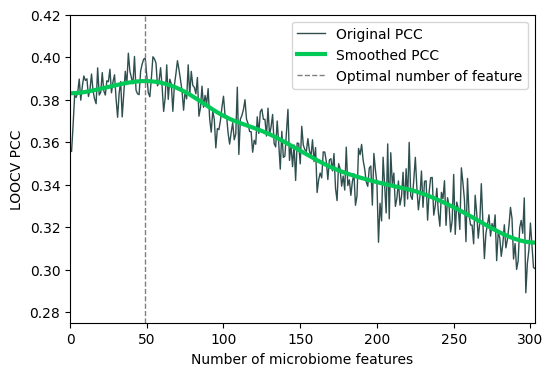

In [6]:
microbiome_LOOCV_res = pd.read_csv('../features/LOOCV_res_pvalue.csv',index_col=0).rename(columns={'0':'Pearson correlation coefficient'})
microbiome_LOOCV_res['Number of microbiome features'] = np.arange(1,304,1)

xs, ys = microbiome_LOOCV_res['Number of microbiome features'],microbiome_LOOCV_res['Pearson correlation coefficient']
smoothed = gaussian_filter(ys, 15.)

plt.figure(figsize=(6,4))

plt.plot(xs,ys,color='#2F4F4F',lw=1, label='Original PCC')
plt.plot(xs,smoothed,color='#00C957',lw=3, label='Smoothed PCC')
plt.axvline(xs[np.argmax(smoothed)],linestyle='--',color='gray',lw=1, label='Optimal number of feature')
plt.xlabel('Number of microbiome features')
plt.ylabel('LOOCV PCC')
plt.xlim(0,303)
plt.ylim(0.275,0.42)

plt.legend()
plt.show()

In [1]:
#pearson_sorted_features.reset_index(drop=True).iloc[:np.argmax(smoothed)+1,].to_csv('../features/optimal_microbiome_features.csv')
selected_df = pd.read_csv('../features/optimal_microbiome_features2.csv',index_col=0)
selected_features = list(selected_df.feature)

NameError: name 'pd' is not defined